In [1]:
from matplotlib import pyplot as plt

def create_g(ax, filename, title):
    data = [[]]
    frame_kenergy = [0]
    frame_penergy = [0]
    
    with open(filename) as file:
    	for line in file.readlines():
    		# print(len(line))
    		if len(line) == 1:
    			data.append([])
    			frame_kenergy.append(0)
    			frame_penergy.append(0)
    		else:
    			data[-1].append(list(map(float, line.split()))[-2:])
    			frame_kenergy[-1] += data[-1][-1][0]
    			frame_penergy[-1] += data[-1][-1][1]
    
    frame_kenergy = frame_kenergy[1: -1]
    frame_penergy = frame_penergy[1: -1]
    
    mk = 1 # max(frame_kenergy) - frame_kenergy[1]
    mp = 1 # max(frame_penergy) - frame_penergy[1]
    ms = mp + mk
    
    ax.plot([(kenergy - frame_kenergy[1]) / mk for kenergy in frame_kenergy], label='kinetic energy')
    ax.plot([(penergy - frame_penergy[1]) / (2 * mp) for penergy in frame_penergy], label='potential energy')	
    ax.plot([((kenergy - frame_kenergy[1]) + (penergy - frame_penergy[1]) / 2)/ ms for penergy, kenergy in zip(frame_penergy, frame_kenergy)], label='total energy')	
    # ax.title = (title)
    
    ax.grid()
    ax.legend()

## create_g(plt, '/home/gibvz/horizons/simulator/euler_noodle/out.txt', 'The first')
## plt.show()

In [2]:
from tqdm.notebook import tqdm

def test(argss, workers = 1):
    outputs = []
    busy_count = 0
    
    active_procs = []
    for args in argss:
        active_procs.append(subprocess.Popen(args, stdout=subprocess.PIPE))
        busy_count += 1
        if busy_count >= workers:
            break
    
    with tqdm(total=len(argss)) as pbar:
        running = True
        procs_cheked = [False for _ in range(len(active_procs))]
        while running:
            running = False
            for proc_i in range(len(active_procs)):
                proc = active_procs[proc_i]
                if proc.poll() is None:
                    running = True
                elif not procs_cheked[proc_i]:
                    outputs.append(proc.stdout.read())
                    pbar.update(1)
                    if busy_count < len(argss):
                        active_procs[proc_i] = subprocess.Popen(argss[busy_count], stdout=subprocess.PIPE)
                        busy_count += 1
                        running = True
                    else:
                        procs_cheked[proc_i] = True
                    # print(busy_count)
    return outputs
    

In [5]:
import subprocess
import numpy as np
import os
##                         path to app,                      out file name,    dt,   particles, iterations

dts = np.linspace(1e-9, 1e-7, 3)
particles = list(map(int, np.linspace(100, 1000, 2)))

steps = 50

argss = []
outputs = []
prog_path = './simulator/main.out'
outputs_path = f'outputs{steps}'

if not outputs_path in os.listdir():
    subprocess.run(['mkdir', outputs_path])

for dt in dts:
    for p in particles:
        outputs.append(outputs_path + f'/euler{dt}_{p}.txt')
        argss.append([prog_path, outputs[-1], str(dt), str(p), str(steps)])

test(argss, 4)
# proc = subprocess.run(['./simulator/euler_noodle/main.out', 'euler.txt',  '0.0001',  '100',     '100'     ])
# while proc.
# create_g(plt, 'euler.txt')

  0%|          | 0/6 [00:00<?, ?it/s]

step 0
step 0
step 1
step 1
step 2
step 2
step 3
step 3
step 4
step 5
step 4
step 6
step 5
step 7
step 6
step 8
step 7
step 9
step 8
step 10
step 11
step 9
step 12
step 10
step 13
step 14
step 11
step 15
step 12
step 16
step 13
step 14
step 17
step 15
step 18
step 16
step 17
step 19
step 18
step 20
step 19
step 21
step 20
step 22
step 21
step 23
step 22
step 24
step 23
step 25
step 24
step 26
step 25
step 26
step 27
step 27
step 28
step 28
step 29
step 29
step 30
step 31
step 30
step 32
step 31
step 33
step 32
step 34
step 33
step 35
step 34
step 36
step 37
step 35
step 38
step 36
step 39
step 37
step 40
step 38
step 41
step 39
step 42
step 40
step 43
step 41
step 44
step 45
step 42
step 43
step 46
step 44
step 47
step 45
step 48
step 49
step 46
step 47
step 0
step 48
step 1
step 49
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15
step 16
step 17
step 18
step 19
step 20
step 21
step 22
step 23
step 24
step 25
step 26
step 27
step 2

[b'', b'', b'', b'', b'', b'']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


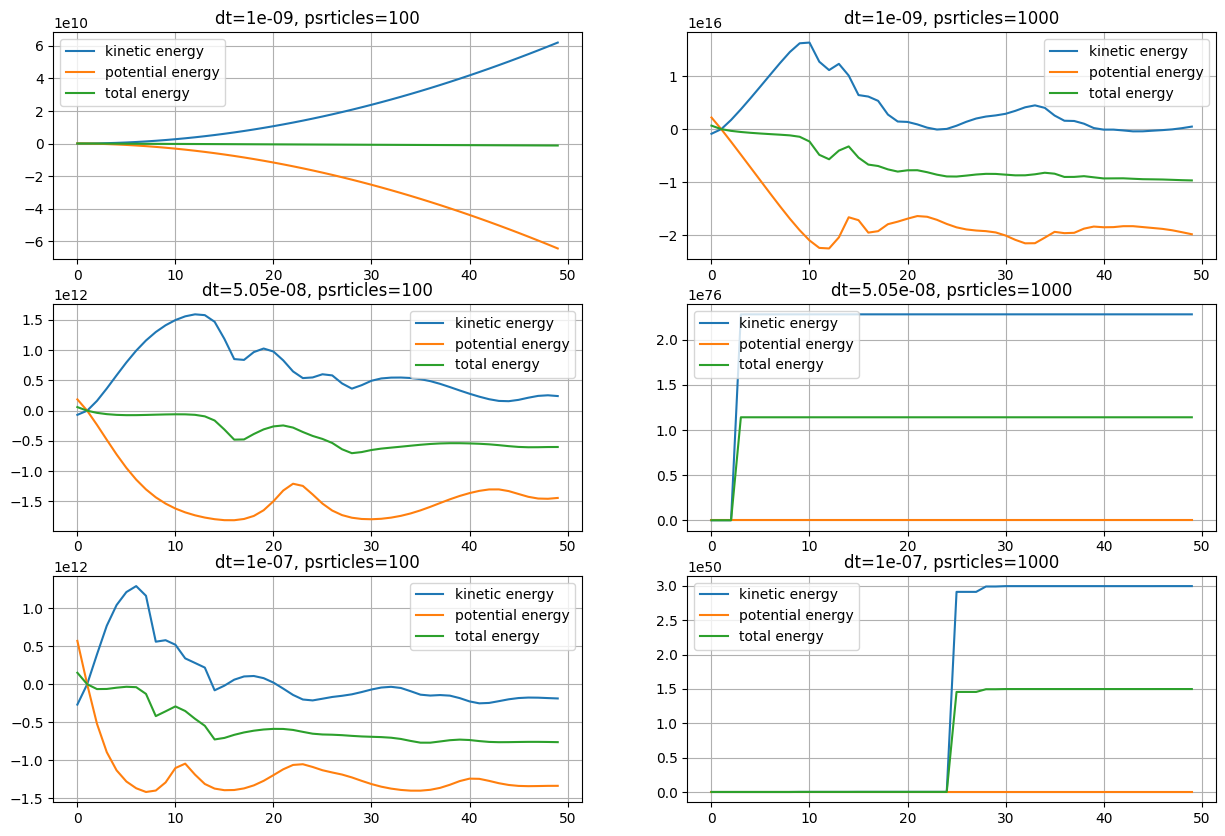

In [8]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(len(dts), len(particles), figsize=(5*len(dts), 5*len(particles)))
# outputs_path = './outputs/'
for dti, dt in enumerate(dts):
    for pi, ps in enumerate(particles):
        create_g(axs[dti, pi], outputs_path + f'/euler{dt}_{ps}.txt', title='')
        axs[dti, pi].set_title(f'dt={dt}, psrticles={ps}')

# axs[0].plot(np.log(x), mean_time)
# #axs[0].title = f'{workers} workers'
# axs[0].set_xlabel('log(N), N - array lenght')
# axs[0].set_ylabel('t, mean time, nanoseconds')
# axs[0].grid()
# # axs[0].savefig(f'bin{len(x)}points{workers}workers_log.jpg', dpi = 1000)

# axs[1].plot(x, mean_time)
# # axs[1].title = f'{workers} workers'
# axs[1].set_xlabel('N, array lenght')
# axs[1].set_ylabel('t, mean time, nanoseconds')
# axs[1].grid()
# # fig.savefig(f'bin{len(x)}points{workers}workers.jpg', dpi = 1000)

plt.savefig(f'big_plot{steps}(periodical).eps', format='eps')
# plt.plot(x[:-4], times)